# Tutorial

Studying an agents based model in EasyABM is basically a 5-step process. 

1. Create agents and model. 
2. Initialise the model, using the `init_model!` function.
3. Define a `step_rule` function and run the model. 
4. Visualisation which can be achieved simply by running `animate_sim(model)`. One can alo explore the model through an interactive app that can be created using the function `create_interactive_app`. 
5. Fetch and analyse data collected during model run. 

We explain these steps below through a very simple model of a star-planet system. Though it can be debated if a star-planet system can really qualify as an agent based model, it nevertheless serves as a good example for demonstrating the workings of EasyABM. 

In [1]:
using Pkg, Revise
Pkg.activate(joinpath(@__DIR__, "../.."))
using EasyABM

  Activating project at `~/Documents/EasyABM`


WebIO._IJuliaInit()

## Step 1: Create the agents and the model.

In the first step we create the agents and the model. For the star-planet system, we need one agent for the star and one for the planet. We will assume that the star is stationary and the planet revolves around it. We set the position of the star to be Vect(5.0,5.0) which is the center point of the 2d space, as the default dimensions of 2d space in EasyABM is 10x10. The position `pos` is only accepted as a Vect which is an inbuilt vector type in EasyABM. It is also recommended for both convenience as well as performance to use Vect type for any vectorial properties in the model such as velocity and forces. We set the position of the planet to be Vect(7.0,5.0) and its velocity to be Vect(0.0,1.0). Since, the planet will change its position we require it to record its position and velocity during the model run. We specify this via `keeps_record_of` argument in the function for creating agent(s). We also have user defined model properties `gravity` and `dt` which stand for the force of gravity and small time interval between position and velocity updates respectively. 

In [2]:
star = con_2d_agent( pos = Vect(5.0,5.0), size = 0.15, color = cl"yellow") # by default 2d space is 10x10, so that (5,5) is center.
planet = con_2d_agent(pos = Vect(7.0,5.0), vel = Vect(0.0,1.0), 
    size=0.05, color = cl"blue", keeps_record_of = Set([:pos, :vel])) 
model = create_2d_model([star, planet], gravity = 3.0, dt=0.1)

EasyABM SpaceModel2D{EasyABM.StaticType, Float64, EasyABM.PeriodicType}: In a EasyABM.StaticType model number of agents is fixed.


## Step 2: Initialise the model.

In this step we define an initialiser function to set the initial properties of the agents. Suppose we want our planet to be at position Vect(5.0,8.0) and velocity Vect(-1.0, 0.0) initially. We can do so by defining an initialiser function and then sending it as an argument to `init_model!` function as follows.

In [3]:
function initialiser!(model)
    planet = model.agents[2]
    planet.pos = Vect(5.0, 8.0)
    planet.vel = Vect(-1.0,0.0)
end

init_model!(model, initialiser = initialiser!)

## Step 3: Define a `step_rule` and run the model

In this step, we define rule for the time evolution and then run the model. We define our `step_rule` to be simply discretisation of Newton's equations for a 2 body system.

In [4]:
function step_rule!(model)
    gravity = model.parameters.gravity
    dt = model.parameters.dt
    star = model.agents[1]
    planet = model.agents[2]
    distance_vector = (star.pos - planet.pos)
    distance = veclength(distance_vector)
    force = gravity*distance_vector/distance^3
    planet.vel += force*dt
    planet.pos += planet.vel*dt
end

step_rule! (generic function with 1 method)

In [5]:
run_model!(model,steps = 500, step_rule=step_rule!)

## Step 4: Visualisation

In order to draw the model at a specific frame, say 4th, one can use

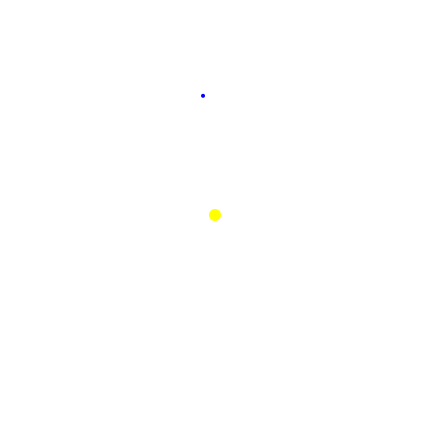

In [6]:
draw_frame(model, frame = 4)

We can look at the animation of the time evolutio with following line of code


In [7]:
animate_sim(model,tail = (30, agent -> agent.color == cl"blue"))

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 501, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(251), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007f4c4a311f50, Task (runnable) @0x00007f4c4a311f50), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 139965628496240, 139965538309184)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\

In [8]:
save_model(model, model_name = "sun_planet_model", save_as = "sun_planet.jld2", folder = ".")

Model with name sun_planet_model saved as sun_planet.jld2 in folder .


A model saved previously as jld2 file, can be fetched as follows 

In [9]:
saved_model = open_model(model_name = "sun_planet_model", path = "sun_planet.jld2")

EasyABM SpaceModel2D{EasyABM.StaticType, Float64, EasyABM.PeriodicType}: In a EasyABM.StaticType model number of agents is fixed.


In [10]:
animate_sim(model)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 501, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(251), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007f4c4aee5f50, Task (runnable) @0x00007f4c4aee5f50), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (139965538301008, 139965538301008, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\

Instead of first running the model, we can create an interactive app in Jupyter notebook to explore the model by setting different values of parameters, as shown below. Here, the `model_control` argument asks EasyABM to create a slider with values from 1 to 5 in steps of 0.2 for the model parameter `gravity`. The agent_controls argument creates a slider for the x component of planet's initial velocity. The tail argument attaches a tail of length 30 with the planet by selecting it with its color property which we previously set to `cl"blue"`. 

In [11]:
create_interactive_app(model, initialiser= initialiser!,
    step_rule= step_rule!,
    model_controls=[(:gravity, "slider", 1:0.2:5.0)], 
    agent_controls=[(:vel, "slider", [Vect(x, 0.0) for x in -10.0:0.1:5.0])],
    frames=200, tail = (30, agent -> agent.color == cl"blue"))  

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(1), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007f4bdac6bd00, Task (runnable) @0x00007f4bdac6bd00), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (1, 139965536697296, 141733920768)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n    

## Step 5: Fetch data

In this simple model, the only data we have collected is the position and velocity of the planet. We can get this data as follows. 

In [12]:
df = get_agent_data(model.agents[2], model).record

Row,pos,vel
,Vect…,Vect…
1,"(5.0, 8.0)\n","(-1.0, 0.0)\n"
2,"(4.75, 7.99667)\n","(-2.5, -0.0333333)\n"
3,"(4.50028, 7.99003)\n","(-2.49724, -0.0663951)\n"
4,"(4.25109, 7.98017)\n","(-2.49186, -0.0985927)\n"
5,"(4.00268, 7.96723)\n","(-2.48412, -0.129407)\n"
6,"(3.75524, 7.95138)\n","(-2.47436, -0.158426)\n"
7,"(3.50894, 7.93285)\n","(-2.463, -0.185368)\n"
8,"(3.2639, 7.91184)\n","(-2.45044, -0.210072)\n"
9,"(3.02019, 7.88859)\n","(-2.43707, -0.232493)\n"


The following line of code returns the data of (half of the) speed of the planet during time evolution.

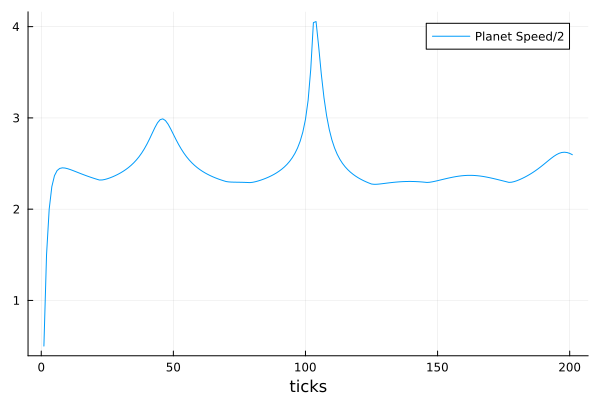

Row,Planet Speed/2
,Float64
1,0.5
2,1.50011
3,1.99912
4,2.24646
5,2.36697
6,2.4232
7,2.44658
8,2.45301
9,2.45057


In [13]:
df1 = get_agents_avg_props(model, 
    agent -> agent.color == cl"blue" ? veclength(agent.vel) : 0.0, 
    labels = ["Planet Speed/2"], plot_result = true)   

In [14]:
using Plots

In [15]:
vels = df[!,"vel"]
vels1=[veclength(v) for v in vels]

201-element Vector{Float64}:
 1.0
 2.5002222123465567
 2.4981242675776207
 2.4938102791144092
 2.487485448098961
 2.479429813002068
 2.469966195228612
 2.4594288610506227
 2.4481377544224134
 2.4363806575707523
 2.4244033732763843
 2.412406571229411
 2.400547359982222
 ⋮
 2.5096181586047788
 2.534011780281989
 2.558015757199188
 2.5806081182849034
 2.6005054236732517
 2.6162726812114676
 2.6265405374129105
 2.630294969043903
 2.6271395256669026
 2.6174083504653867
 2.602070538453773
 2.5824763816106016

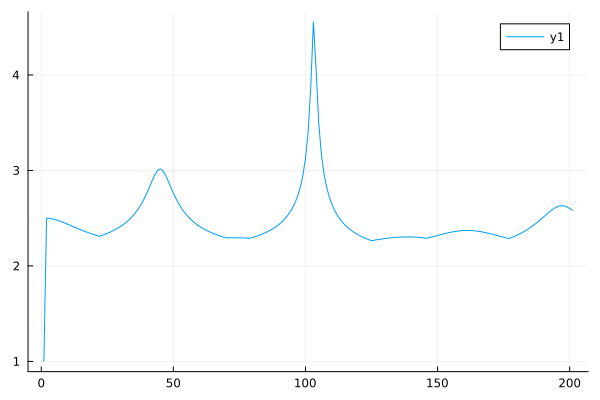

In [16]:
plot(vels1)